In [3]:
import sys
print(sys.version)

3.9.6 (default, Nov 10 2023, 13:38:27) 
[Clang 15.0.0 (clang-1500.1.0.2.5)]


In [4]:
import numpy as np

# Load preprocessed data
train_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/train_input.npy')
train_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/train_output.npy')
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')
val_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/val_input.npy')
val_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/val_output.npy')





# Check the shapes of the data
print("Training input shape:", train_input.shape)
print("Training output shape:", train_output.shape)
print("Validation input shape:", val_input.shape)
print("Validation output shape:", val_output.shape)



Training input shape: (570, 256, 256)
Training output shape: (570, 256, 256)
Validation input shape: (90, 256, 256)
Validation output shape: (90, 256, 256)


In [5]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Load the data
# Load preprocessed data
train_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/train_input.npy')
train_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/train_output.npy')
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')
val_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/val_input.npy')
val_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/val_output.npy')


# Shuffle the data
train_input, train_output = shuffle(train_input, train_output, random_state=42)
val_input, val_output = shuffle(val_input, val_output, random_state=42)

# Define preprocessing functions
def preprocess_image(image):
    # Apply intensity normalization
    image = (image - np.percentile(image, 1)) / (np.percentile(image, 99) - np.percentile(image, 1))
    # Clip pixel values to [0, 1]
    image = np.clip(image, 0, 1)
    return image

def preprocess_data(images):
    preprocessed_images = []
    for image in images:
        preprocessed_image = preprocess_image(image)
        preprocessed_images.append(preprocessed_image)
    return np.array(preprocessed_images)

# Preprocess the data
train_input_preprocessed = preprocess_data(train_input)
train_output_preprocessed = preprocess_data(train_output)
val_input_preprocessed = preprocess_data(val_input)
val_output_preprocessed = preprocess_data(val_output)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_input_preprocessed, train_output_preprocessed, test_size=0.2, random_state=42)

# Save preprocessed data
np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)


Training input shape: (456, 256, 256)
Training output shape: (456, 256, 256)
Validation input shape: (114, 256, 256)
Validation output shape: (114, 256, 256)


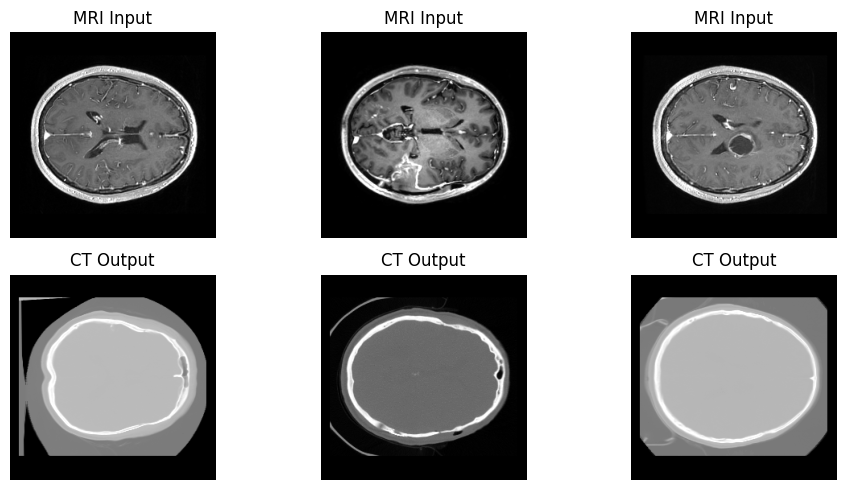

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

# Check the shape of the data
print("Training input shape:", X_train.shape)
print("Training output shape:", y_train.shape)
print("Validation input shape:", X_val.shape)
print("Validation output shape:", y_val.shape)

# Visualize a few samples
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('MRI Input')
    plt.axis('off')

    plt.subplot(2, 3, i+4)
    plt.imshow(y_train[i], cmap='gray')
    plt.title('CT Output')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    up1 = layers.UpSampling2D((2, 2))(conv3)
    up1 = layers.concatenate([conv2, up1], axis=-1)

    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(up1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)
    up2 = layers.UpSampling2D((2, 2))(conv4)
    up2 = layers.concatenate([conv1, up2], axis=-1)

    # Output
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(up2)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (256, 256, 1)

# Create the model
model = unet_model(input_shape)

# Print model summary
model.summary()


/Users/chintubharath/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 384)              │            │ up_sampling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 256, 256,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256, 256,  │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 192)              │            │ up_sampling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │        193 │ concatenate_1[0]… │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,734,529 (6.62 MB)

 Trainable params: 1,734,529 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


In [9]:

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20, verbose=1)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - loss: 0.0831 - val_loss: 0.0239
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 277s 10s/step - loss: 0.0244 - val_loss: 0.0264
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - loss: 0.0235 - val_loss: 0.0202
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - loss: 0.0201 - val_loss: 0.0177
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - loss: 0.0173 - val_loss: 0.0173
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - loss: 0.0173 - val_loss: 0.0161
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 155s 5s/step - loss: 0.0173 - val_loss: 0.0169
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 213s 7s/step - loss: 0.0161 - val_loss: 0.0153
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - loss: 0.0142 - val_loss: 0.0151
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - loss: 0.0153 - val_loss: 0.0158
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - loss: 0.0153 - val_loss: 0.0143
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - loss: 0.

In [12]:
# Save the trained model in the native Keras format
model.save("image_fusion_model.h5")

In [13]:
model.save("image_fusion_model.keras")


In [14]:
# Evaluate the model
loss = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0110
Validation Loss: 0.011257804930210114


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


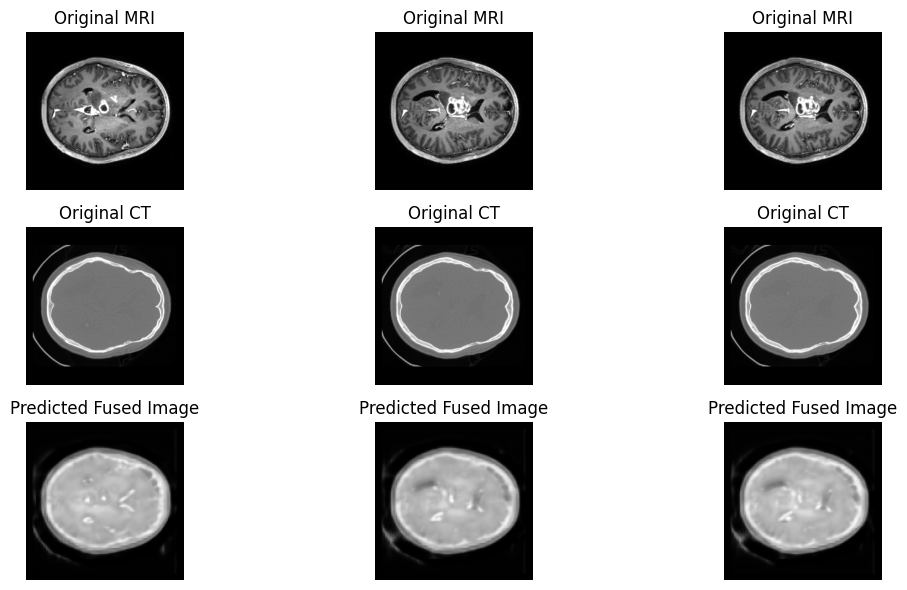

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the preprocess_data function
def preprocess_data(images):
    preprocessed_images = []
    for image in images:
        # Apply any preprocessing steps as needed
        # For example, normalization
        preprocessed_image = (image - np.min(image)) / (np.max(image) - np.min(image))
        preprocessed_images.append(preprocessed_image)
    return np.array(preprocessed_images)

# Load the trained model
model = load_model("image_fusion_model.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Normalize the test data (similar to training data preprocessing)
test_input_normalized = preprocess_data(test_input)

# Predict fused images
predicted_output = model.predict(test_input_normalized)

# Display a few samples of the original MRI, original CT, and predicted fused images
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_input[i], cmap='gray')
    plt.title('Original MRI')
    plt.axis('off')
    
    plt.subplot(3, 3, i+4)
    plt.imshow(test_output[i], cmap='gray')
    plt.title('Original CT')
    plt.axis('off')
    
    plt.subplot(3, 3, i+7)
    plt.imshow(predicted_output[i].squeeze(), cmap='gray')
    plt.title('Predicted Fused Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


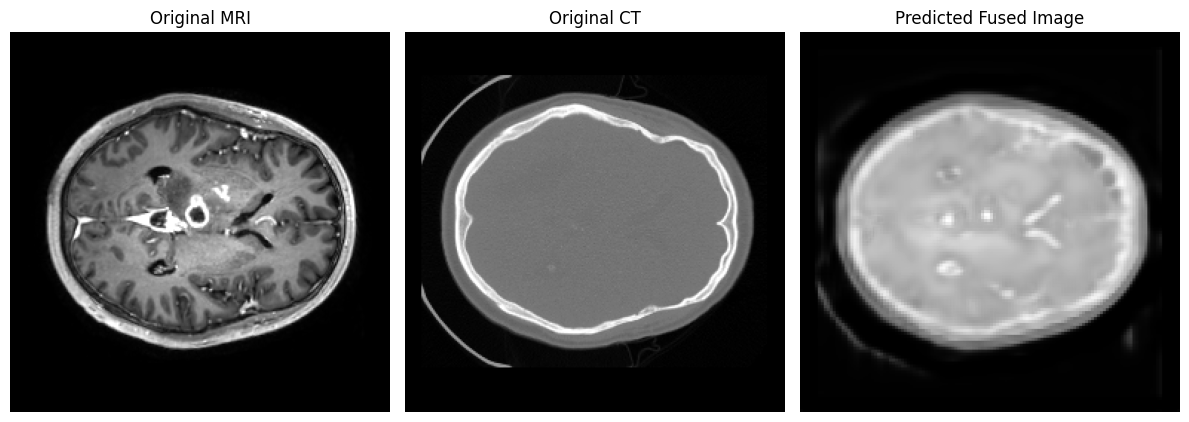

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the preprocess_data function
def preprocess_data(images):
    preprocessed_images = []
    for image in images:
        # Apply any preprocessing steps as needed
        # For example, normalization
        preprocessed_image = (image - np.min(image)) / (np.max(image) - np.min(image))
        preprocessed_images.append(preprocessed_image)
    return np.array(preprocessed_images)

# Load the trained model
model = load_model("image_fusion_model.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Normalize the test data (similar to training data preprocessing)
test_input_normalized = preprocess_data(test_input)

# Predict fused images
predicted_output = model.predict(test_input_normalized)

# Display one sample of the original MRI, original CT, and predicted fused image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_input[0], cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_output[0], cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_output[0].squeeze(), cmap='gray')
plt.title('Predicted Fused Image')
plt.axis('off')

plt.tight_layout()
plt.show()




U-Net model architecture for image segmentation.

In [5]:

# Load the CT and MRI images
ct_image_path = "/Users/chintubharath/Documents/sdp/Imfusion-main/demo/medical1.png"
mri_image_path = "/Users/chintubharath/Documents/sdp/Imfusion-main/demo/medical2.png"




In [3]:
# Compile the model
model_2.compile(optimizer='adam', loss='mse')



In [5]:
import numpy as np

# Load the training and validation data
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

# Train the model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20, verbose=1)





Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - loss: 0.0795 - val_loss: 0.0306
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 0.0270 - val_loss: 0.0214
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0232 - val_loss: 0.0230
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 0.0222 - val_loss: 0.0199
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - loss: 0.0199 - val_loss: 0.0222
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 0.0224 - val_loss: 0.0199
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0195 - val_loss: 0.0180
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0181 - val_loss: 0.0185
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0190 - val_loss: 0.0182
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0181 - val_loss: 0.0186
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - loss: 0.0181 - val_loss: 0.0167
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - loss: 0.0176 - val_l

In [6]:
# Save the trained model in the native Keras format
model_2.save("unet_model2.h5")

In [7]:
# Save the trained model in the native Keras format
model_2.save("unet_model2.keras")

In [8]:

# Evaluate the model on the validation data
loss_2 = model_2.evaluate(X_val, y_val)
print("Validation Loss for Model-2:", loss_2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0155
Validation Loss for Model-2: 0.015633847564458847


/Users/chintubharath/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


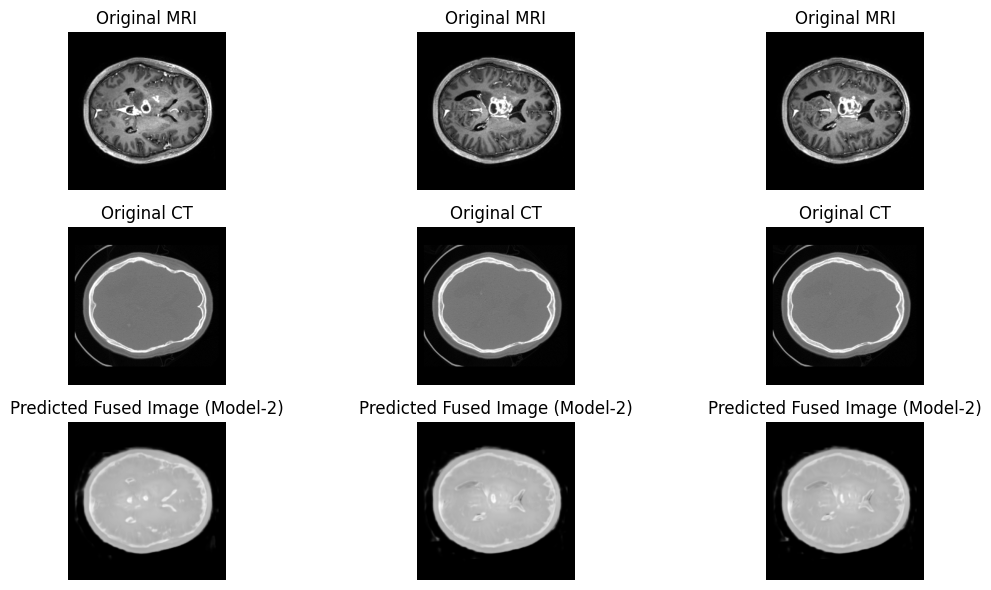

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load Model-2
model_2 = load_model("unet_model2.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Preprocess the test data if necessary
# Assuming no preprocessing is required as it's already preprocessed

# Normalize the test data if necessary
# Assuming data is already normalized

# Predict outputs using Model-2
predicted_output_model_2 = model_2.predict(test_input)

# Visualize the original MRI, original CT, and the predicted fused image using Model-2
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_input[i], cmap='gray')
    plt.title('Original MRI')
    plt.axis('off')
    
    plt.subplot(3, 3, i+4)
    plt.imshow(test_output[i], cmap='gray')
    plt.title('Original CT')
    plt.axis('off')
    
    plt.subplot(3, 3, i+7)
    plt.imshow(predicted_output_model_2[i].squeeze(), cmap='gray')
    plt.title('Predicted Fused Image (Model-2)')
    plt.axis('off')

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


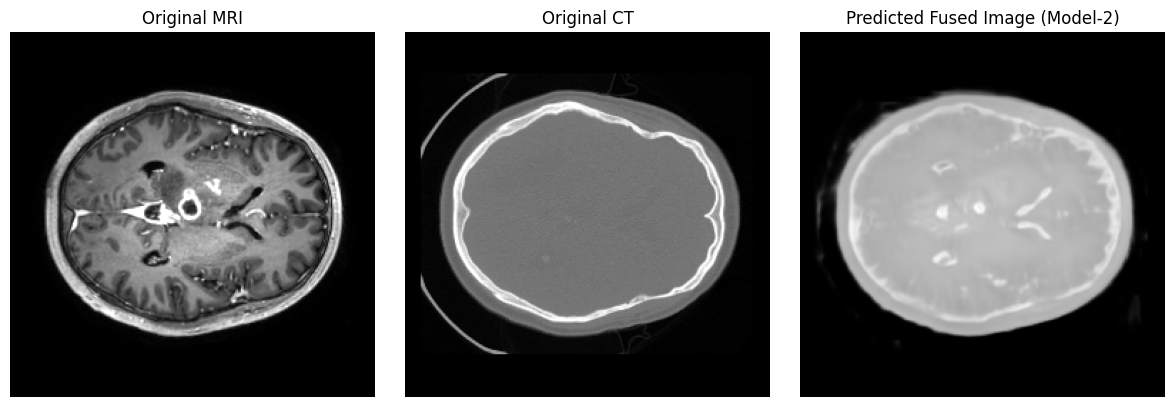

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load Model-2
model_2 = load_model("unet_model2.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Preprocess the test data if necessary
# Assuming no preprocessing is required as it's already preprocessed

# Normalize the test data if necessary
# Assuming data is already normalized

# Predict outputs using Model-2
predicted_output_model_2 = model_2.predict(test_input)

# Visualize one sample of the original MRI, original CT, and the predicted fused image using Model-2
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(test_input[0], cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_output[0], cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_output_model_2[0].squeeze(), cmap='gray')
plt.title('Predicted Fused Image (Model-2)')
plt.axis('off')

plt.tight_layout()
plt.show()


/Users/chintubharath/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


4/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x34abb8820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


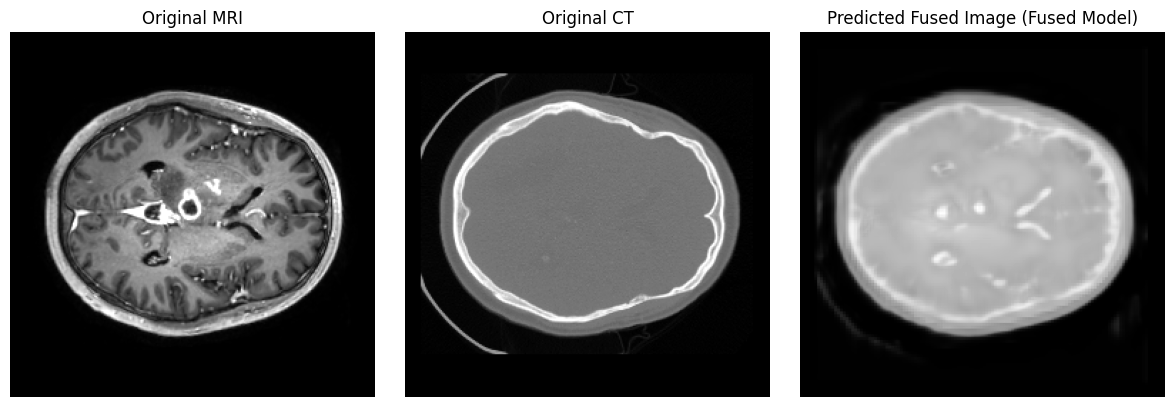

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load Model-1
model_3 = load_model("image_fusion_model.keras")
# Load Model-2
model_4 = load_model("unet_model2.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Preprocess the test data if necessary
# Assuming no preprocessing is required as it's already preprocessed

# Normalize the test data if necessary
# Assuming data is already normalized

# Predict outputs using Model-1
predicted_output_model_1 = model_3.predict(test_input)
# Predict outputs using Model-2
predicted_output_model_2 = model_4.predict(test_input)

# Fuse the predictions by averaging
fused_output = (predicted_output_model_1 + predicted_output_model_2) / 2.0

# Visualize one sample of the original MRI, original CT, and the predicted fused image using the fused model
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(test_input[0], cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_output[0], cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fused_output[0].squeeze(), cmap='gray')
plt.title('Predicted Fused Image (Fused Model)')
plt.axis('off')

plt.tight_layout()
plt.show()


/Users/chintubharath/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/chintubharath/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


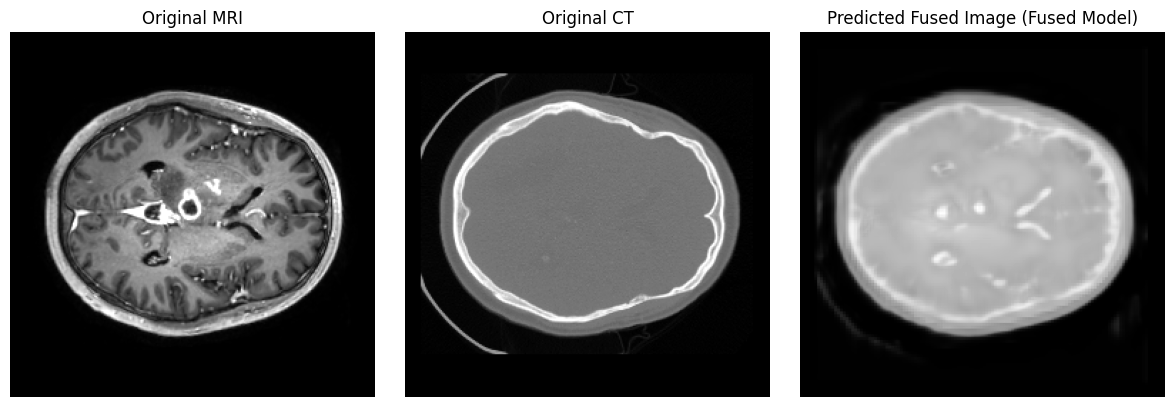

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load Model-1
model_3 = load_model("image_fusion_model.keras")
# Load Model-2
model_4 = load_model("unet_model2.keras")

# Load the test data
test_input = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_input.npy')
test_output = np.load('/Volumes/Personal/SDP/Brain tumor MRI and CT scan/data(processed)/test_output.npy')

# Preprocess the test data if necessary
# Assuming no preprocessing is required as it's already preprocessed

# Normalize the test data if necessary
# Assuming data is already normalized

# Predict outputs using Model-1
predicted_output_model_1 = model_3.predict(test_input)
# Predict outputs using Model-2
predicted_output_model_2 = model_4.predict(test_input)

# Fuse the predictions by averaging
fused_output = (predicted_output_model_1 + predicted_output_model_2) / 2.0

# Visualize one sample of the original MRI, original CT, and the predicted fused image using the fused model
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(test_input[0], cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(test_output[0], cmap='gray')
plt.title('Original CT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fused_output[0].squeeze(), cmap='gray')
plt.title('Predicted Fused Image (Fused Model)')
plt.axis('off')

plt.tight_layout()
plt.show()
